Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

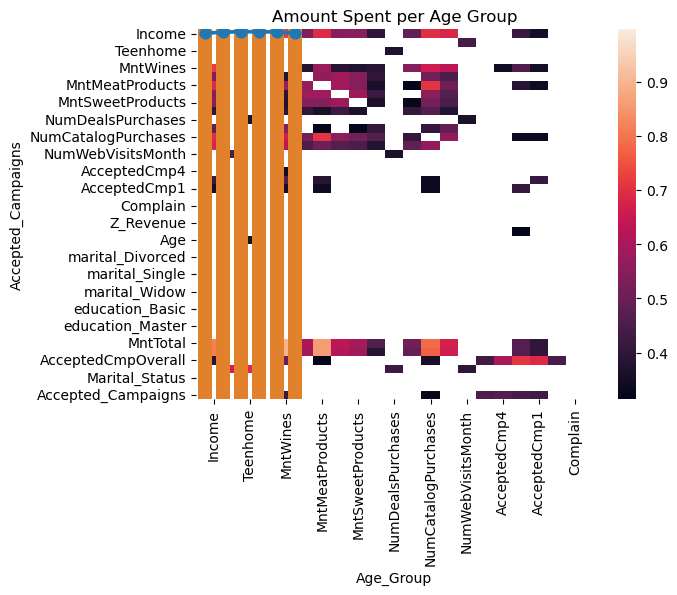

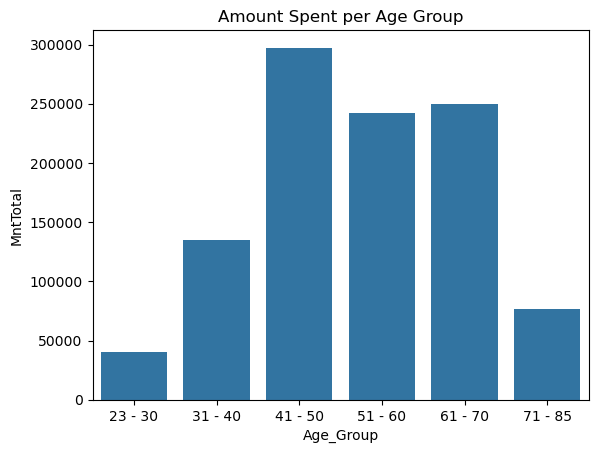

<Axes: xlabel='Marital_Status', ylabel='Accepted_Campaigns'>

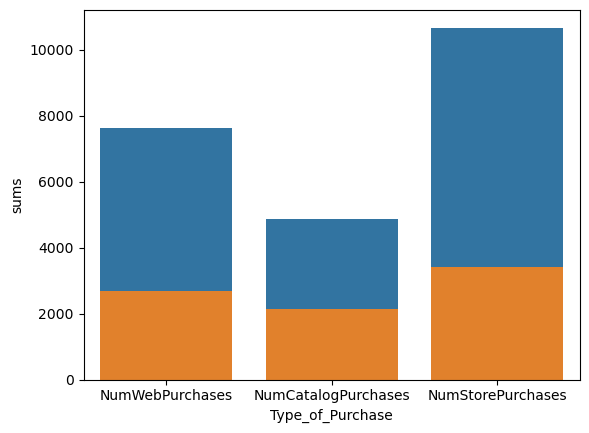

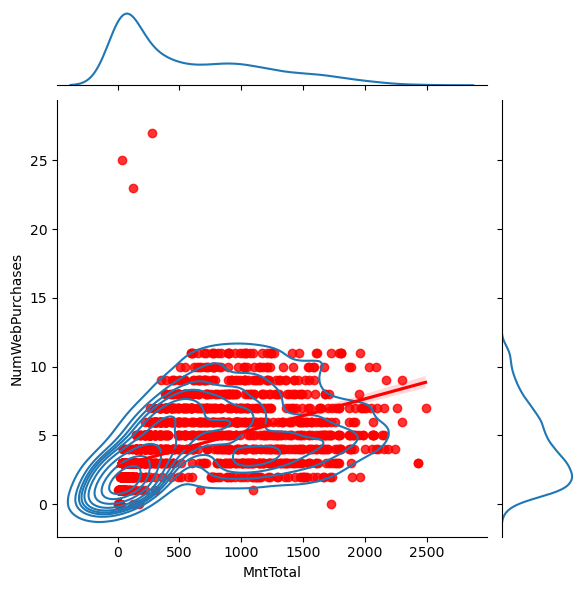

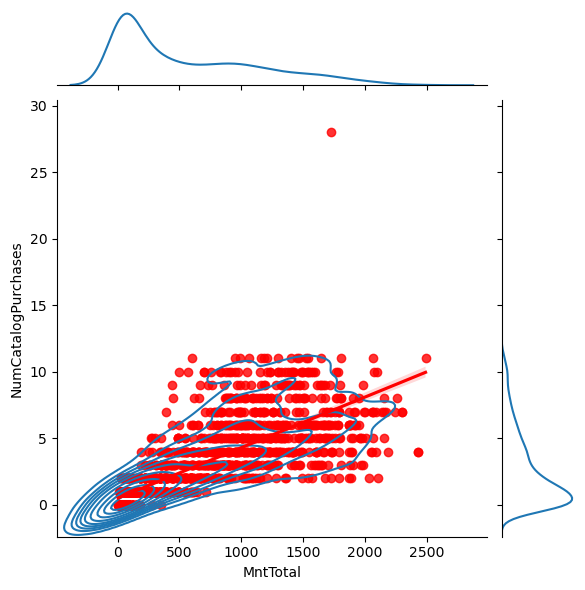

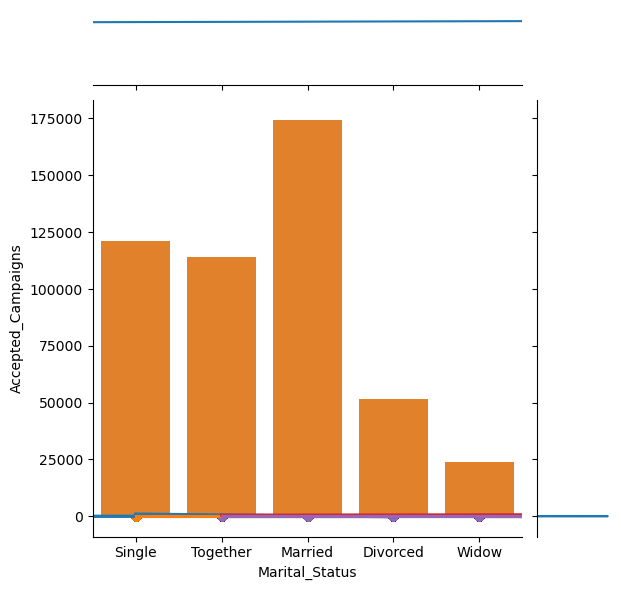

In [5]:
import pandas as pd

food = pd.read_csv(r'C:\Users\David\OneDrive\DAVID PHYTON FILE\u_food_marketing.csv')

pd.set_option('display.max.rows',2300)
pd.set_option('display.max.columns', 50)

food[food.duplicated()].sum()

food.drop_duplicates(keep = False , inplace = True)


food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)

food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

food['Marital_Status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis = 1)

food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

food['Education_Status'] = food[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].sum(axis = 1)

food['Accepted_Campaigns'] = food[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2', 'Response']].sum(axis = 1)

food['Accepted_Campaigns'] = (food['Accepted_Campaigns']!=0).astype(int)

food[food['Accepted_Campaigns']!=0].head()

# Select only numeric columns
numeric_food = food.select_dtypes(include=['number'])
# Now compute the correlation
correlation = numeric_food.corr(method='pearson')['Accepted_Campaigns'].sort_values(ascending=False)
print(correlation)

import seaborn as sns
numeric_food = food.select_dtypes(include=['number'])
allnumeric_food = numeric_food.corr(method='pearson')
allnumeric_food = allnumeric_food[(allnumeric_food > 0.3) & (allnumeric_food <1)]
sns.heatmap(allnumeric_food)

allnumeric_food 


age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range  [0]<= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")
food['Age_Group'] = food['Age'].apply(assign_age_group)

import seaborn as sns
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']
sns.pointplot(data = food, x ='Age_Group', y = 'Accepted_Campaigns', order = age_order )

counts = food['Age_Group'].value_counts()

percentage = counts / food.shape[0]

percent_food = percentage.reset_index()

percent_food.columns = ['age_group','percentage']

percent_food = percent_food.sort_values('age_group')

import matplotlib.pyplot as plt
sns.barplot(x = 'age_group', y = 'percentage', data = percent_food )
plt.title('Percentage of Accepted Campaigns per Age Group')


grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food )
plt.title('Amount Spent per Age Group')
plt.show()

acct_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food )
plt.title('Amount Spent per Age Group')
plt.show()

sum_food = pd.DataFrame(food [['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['sums'])

sum_food= sum_food.reset_index()

sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)


sns.barplot(x = 'Type_of_Purchase', y = 'sums', data = sum_food )


acct_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp [['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['sums'])
sum_food= sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'sums', data = sum_food )

x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)

# education isnt really significant in our segmentation

sns.countplot(x = 'Marital_Status_str', data = food)

sns.regplot(x = 'Marital_Status', y = 'Accepted_Campaigns', data = food)

accpt = food[food['Accepted_Campaigns'] != 0]
rel_food = accpt.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food)

total = food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns']==1]['Marital_Status_str'].value_counts()

pect_marital = accepted / total * 100

pect_food= pect_marital.reset_index()
pect_food.columns = ['Marital_Status', 'Percentage']

sns.barplot(x = 'Marital_Status', y = 'Percentage', data = pect_food)
